## 1. Consider two classes described by the covariance matrices below (assume zero mean) 
                                            a.∑=[1 0]      b.∑=[1 0.9]
                                                [0 1]          [0.9 1]

### a) For each matrix generate 1000 data samples and plot them on separate figures.

Populating the interactive namespace from numpy and matplotlib


/Users/tushar/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


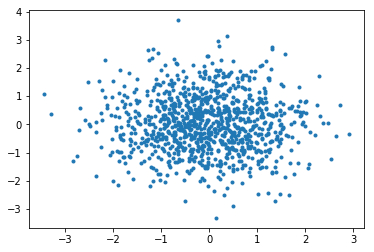

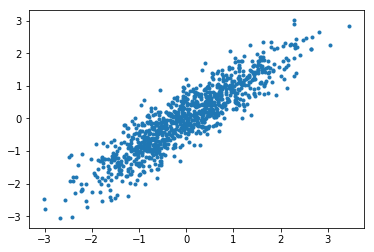

In [21]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import patches
# numpy.set_printoptions(threshold=numpy.inf)



a_cov = [[1.0, 0.0], [0.0, 1.0]]
b_cov = [[1.0, 0.9], [0.9, 1.0]]
mean = [0, 0]

data_a = np.random.multivariate_normal(mean, a_cov, 1000)
plt.plot(data_a[:,0],data_a[:,1],'.')
plt.show()

data_b = np.random.multivariate_normal(mean, b_cov, 1000)
plt.plot(data_b[:,0],data_b[:,1],'.')
plt.show()

### b) For each case calculate first standard deviation contour as a function of the mean, eigenvalues, and eigenvectors. Show your calculation (Hint: consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation.
Plot each contour on the respective plots from part (a).

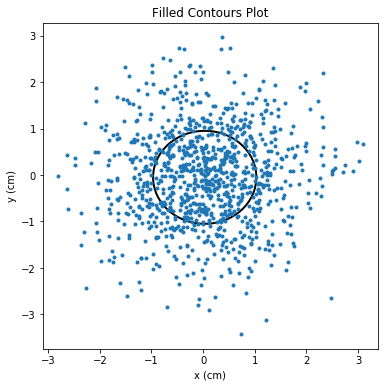

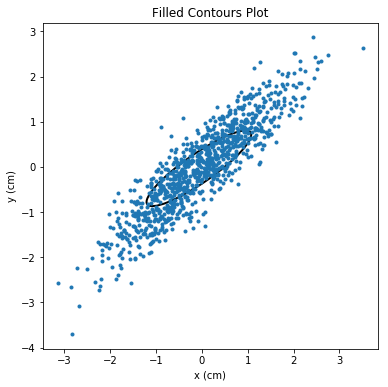

In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches

w_a,v_a=np.linalg.eig(a_cov)
w_b,v_b=np.linalg.eig(b_cov)

std_a=np.sqrt(w_a)
std_b=np.sqrt(w_b)



# XXXXXXXXXXXXXXXXXXXXXX using contour XXXXXXXXXXXXXXXXXXXXXXX
# X, Y = np.meshgrid(data_b[:,0], data_b[:,1])
# A=np.pi
# # n1=(X*np.cos(A)+Y*np.sin(A))**2
# # n2=(X*np.sin(A)+Y*np.cos(A))**2
# d1=(std_b[0]**2)
# d2=(std_b[1]**2)
# Z = -(n1/d1+ n2/d2)

angle = np.degrees(np.arctan(np.dot (v_a[0],np.array ([1,0]))))
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(data_a[:,0], data_a[:,1],'.')
e1 = patches.Ellipse((np.mean(data_a[:,0]), np.mean(data_a[:,1])), 
                     std_a[0]*2, std_a[1]*2,angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()


angle = np.degrees(np.arctan(np.dot (v_b[0],np.array ([1,0]))))
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(data_b[:,0], data_b[:,1],'.')
e2 = patches.Ellipse((np.mean(data_b[:,0]), np.mean(data_b[:,1])),
                     std_b[0]*2, std_b[1]*2, angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e2)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

### c) Calculate sample covariance matrices for each class using the data generated in part(a). Do not use a Python/Matlab function for computing the covariance.

In [3]:
numerator = data_a - np.mean(data_a)
print("Cov(A):\n",np.matmul(numerator.T, numerator) / len(numerator))

numerator = data_b - np.mean(data_b)
print("\nCov(B):\n",np.matmul(numerator.T, numerator) / len(numerator))

Cov(A):
 [[1.0097748  0.04200538]
 [0.04200538 1.06545669]]

Cov(B):
 [[1.02520055 0.90001767]
 [0.90001767 0.97998474]]


### d) Compare the given covariance matrix for each class with the corresponding sample covariance matrix generated in (b).

In [139]:
tmp = np.cov(data_a[:,0],data_a[:,1])
mse = ((a_cov - tmp)**2).mean(axis=None)
print("RMSE for cov A:",mse)


tmp = np.cov(data_b[:,0],data_b[:,1])
mse = ((b_cov - tmp)**2).mean(axis=None)
print("RMSE for cov B:",mse)

RMSE for cov A: 0.002244324919209888
RMSE for cov B: 0.000481734054888333


## 2. Consider a 2D problem with 3 classes where each class is described by the following priors, mean vectors, and covariance matrices.

                                            P(C1) = 0.2
                                            μ1 =[3 2]𝑇
                                            ∑1=[1 −1] 
                                               [−1 2]

                                            P(C2) = 0.3
                                            μ2 =[5 4]𝑇
                                            ∑2=[1 −1] 
                                                [−1 7]

                                            P(C3) = 0.5
                                            μ3 =[2 5]𝑇
                                            ∑3=[0.5 0.5] 
                                                [0.5 3]

### a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.


-2.588018294692748


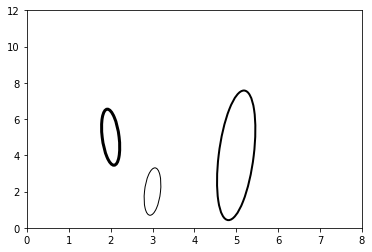

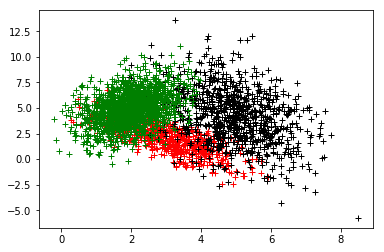

In [5]:
p_1 = 0.2
mean_1 = [3, 2]
cov_1=[[1,-1],[-1,2]]

p_2 = 0.3
mean_2 = [5, 4]
cov_2=[[1,-1],[-1,7]]

p_3 = 0.5
mean_3 = [2, 5]
cov_3=[[0.5,0.5],[0.5,3]]



fig,ax = plt.subplots(1)
ax.set_xlim([0, 8])
ax.set_ylim([0, 12])



w1,vec1=np.linalg.eig(cov_1)
vx, vy = vec1[:,0][0], vec1[:,0][1]
theta = np.arctan2(vy, vx)

print(theta)

e1 = patches.Ellipse((mean_1[0], mean_1[1]), w1[0], w1[1], angle=theta, linewidth=1, fill=False, zorder=1)

w2,v2=np.linalg.eig(cov_2)
vx, vy = v2[:,0][0], v2[:,0][1]
theta = np.arctan2(vy, vx)
e2 = patches.Ellipse((mean_2[0], mean_2[1]), w2[0], w2[1], angle=theta, linewidth=2, fill=False, zorder=1)

w3,v3=np.linalg.eig(cov_3)
vx, vy = v3[:,0][0], v3[:,0][1]
theta = np.arctan2(vy, vx)
e3 = patches.Ellipse((mean_3[0], mean_3[1]), w3[0], w3[1], angle=theta, linewidth=3, fill=False, zorder=1)


ax.add_patch(e1)
ax.add_patch(e2)
ax.add_patch(e3)
plt.show()


data_1 = np.random.multivariate_normal(mean_1, cov_1, int(p_1*3000))
plt.plot(data_1[:,0],data_1[:,1],'r+')

data_2 = np.random.multivariate_normal(mean_2, cov_2, int(p_2*3000))
plt.plot(data_2[:,0],data_2[:,1],'k+')

data_3 = np.random.multivariate_normal(mean_3, cov_3, int(p_3*3000))
plt.plot(data_3[:,0],data_3[:,1],'g+')


plt.show()

### 3. The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the data set is a 28x28 image. The data is divided into two sets of images: a training set and a testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/. Use only the training set to perform this part.

In [2]:
import gzip
import numpy as np

image_size = 28
training_samples = 60000

f_train = gzip.open('train-images-idx3-ubyte.gz','r')
f_train.read(16)
buf = f_train.read(image_size * image_size * training_samples)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# train_data = data.reshape(num_images, image_size, image_size)
train_data = train_data.reshape(training_samples, image_size, image_size)


f_train_label = gzip.open('train-labels-idx1-ubyte.gz','r')
f_train_label.read(8)
buf = f_train_label.read(training_samples)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)


testing_images = 10000
f_test = gzip.open('t10k-images-idx3-ubyte.gz','r')
f_test.read(16)
buf = f_test.read(image_size * image_size * testing_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(testing_images, image_size , image_size)


f_test_label = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f_test_label.read(8)
buf = f_test_label.read(testing_images)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)


# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# print(train_labels[10])
# print(train_data[10])

a). Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of samples, D is the number of input features, and d is the number of features selected by the PCA algorithm. Note that you must compute the PCA computation method by yourself. You may use preexisting functions for Eigen computation.

In [63]:
def pca_from_no_dimentions(data, dimentions):
    mean = np.mean(data)
    X = data - mean
    cov = np.cov(X)
      
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    eigen_vectors=eigen_vectors.real
    eigen_values=eigen_values.real
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    largest_eigen_values_index = i[:dimentions]
    
    eigen_vectors_with_largest_eigen_values = eigen_vectors[:,largest_eigen_values_index]
    P = np.dot(eigen_vectors_with_largest_eigen_values.T,X) 
    return np.array(P), eigen_vectors_with_largest_eigen_values, eigen_values


data = train_data.reshape(training_samples, image_size * image_size)
lower_dimentions_data, EV, eigen_values =pca_from_no_dimentions(np.array(data.T), 154,)

print("Original Data Shape:",np.array(data.T).shape)
print("Lower Dimention Data Shape:",lower_dimentions_data.T.shape)

Original Data Shape: (784, 60000)
Lower Dimention Data Shape: (60000, 154)


b) Propose a suitable d using proportion of variance (POV) =95%.

In [3]:
def pca_from_pov(data, pov):
    mean = np.mean(data)
    mean_sub = data - mean
    
    cov = np.cov(mean_sub)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    EV = eigen_values
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    sum_eigen_values = np.sum(eigen_values)
    
    data2 = []
    tot = 0.0
    for x in i:
        if tot/sum_eigen_values < pov:
            tot+=eigen_values[x]
            data2.append(data[:,x])
        else: 
            break
    return np.array(data2), eigen_vectors

data = train_data.reshape(training_samples, image_size * image_size)
lower_dimension_data, EV=pca_from_pov(np.array(data.T),0.95)
print("Original Data Shape:",data.shape)
print("Lower Dimention Data Shape:",lower_dimension_data.shape)

Original Data Shape: (60000, 784)
Lower Dimention Data Shape: (154, 784)


c) Program PCA reconstruction that takes 𝑌 (dxN) and returns 𝑋 (DxN) (i.e., a
reconstructed image). For different values of d= {1, 2, 3, 4, ..., 784} reconstruct all samples and calculate the average mean square error (MSE). Plot MSE (y-axis) versus d (x-axis). Discuss the results.

Lower Dimention Data Shape: (154, 60000)
Reconstructed Data Shape  (784, 60000)
(60000, 28, 28)
(60000, 28, 28)


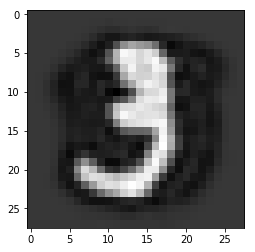

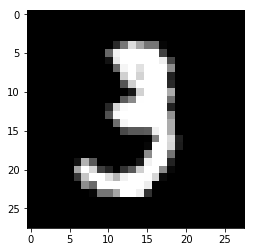

In [64]:
data = train_data.reshape(training_samples, image_size * image_size)
lower_dimentions_data, eigen_vector, eigen_values=pca_from_no_dimentions(np.array(data.T), 154)
print("Lower Dimention Data Shape:",lower_dimentions_data.shape)

reconstructed_data = np.array(np.dot(eigen_vector,lower_dimentions_data))
print("Reconstructed Data Shape ",reconstructed_data.shape)


tt = reconstructed_data.T.reshape(training_samples, image_size, image_size)

print(tt.shape)
print(train_data.shape)

plt.imshow(tt[10], cmap='gray')
plt.show()

plt.imshow(train_data[10], cmap='gray')
plt.show()

d) Reconstruct a sample from the class of number ‘5’ and show it as a ‘png’ image for d= {1, 10, 50, 250, 784}. Discuss the results.

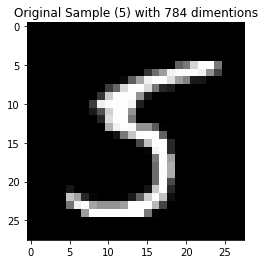

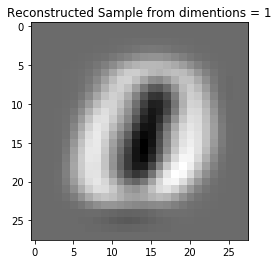

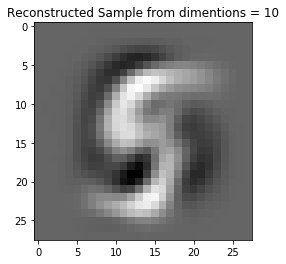

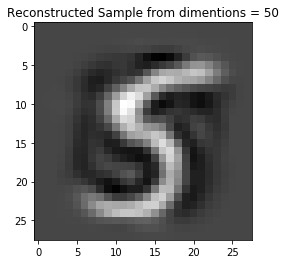

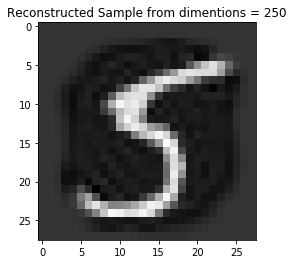

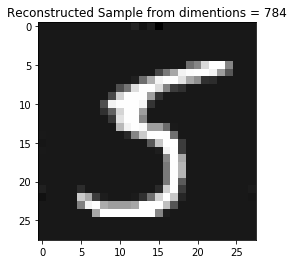

In [65]:
i=len(train_labels)-1
while i > 0:
    if train_labels[i] == 5: break
    i-=1

plt.title('Original Sample (5) with 784 dimentions')
plt.imshow(train_data[i], cmap='gray')
plt.show()
    
data = train_data.reshape(training_samples, image_size * image_size)
d=[1,10,50,250,784]

for val in d:
    lower_dimentions_data, eigen_vector, eigen_values=pca_from_no_dimentions(np.array(data.T), val)
    reconstructed_data = np.array(np.dot(eigen_vector,lower_dimentions_data))
    reconstructed_data_reshaped = reconstructed_data.T.reshape(training_samples, image_size, image_size)
    plt.title('Reconstructed Sample from dimentions = %i'%val)
    plt.imshow(reconstructed_data_reshaped[i], cmap='gray')
    plt.show()

e) For the values of d= {1, 2, 3, 4, ..., 784} plot eigenvalues (y-axis) versus d (x-axis). Discuss the results.

In [ ]:
d = np.arange(50)
e = []
for val in d:
    lower_dimentions_data, eigen_vector, eigen_values=pca_from_no_dimentions(np.array(data.T), val+1)
    
    cov = np.cov(lower_dimentions_data.T)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    e.append(np.max(eigen_values))
    print("Test:", val,""," - ",end="\r")

print(d)
print(e)
plt.plot(d,e)
plt.show()

## 4. Once again, consider the MNIST dataset. Use the training set as your training data and the test set as your test data.

a) Classify the test data using a kNN classifier. Report the accuracy for k = {1,3,5,11}. Justify and compare the reported accuracies for the different values of k. Do not use kNN implemented function in Python/Matlab and implement it by yourself.

In [97]:
def get_euclidean_distance(sample1, sample2):
    mat = sample1.__sub__(sample2)
    return (np.sqrt(np.sum(np.power(mat,2))))
   

def my_knn(train_data, train_labels, test_sample, k):
    
    distance_array = []
    for i in range(len(train_data)):
        d = get_euclidean_distance(train_data[i],test_sample)
        distance_array.append([d, train_labels[i]])
        
    distance_array=np.array(distance_array)   
    distance_array = distance_array[distance_array[:,0].argsort()]
    total_neighbours = distance_array[:k]
    
    k_classes= total_neighbours[:,1]
    neighbours_info = []
    for i in range(len(k_classes)):
        val = k_classes[i]
        if len(neighbours_info) == 0:
            neighbours_info.append([val,1])
        else:
            index = 0
            while index < len(neighbours_info):
                if neighbours_info[index][0] == val: 
                    break 
                index+=1
            if index < len(neighbours_info):
                neighbours_info[index][1]+=1
            else:    
                neighbours_info.append([val,1])
    neighbours_info=np.array(neighbours_info) 
    neighbours_info = neighbours_info[neighbours_info[:,1].argsort()]
    neighbours_info=neighbours_info[::-1]
    return k_classes, neighbours_info[0][0]

In [116]:
k = 1

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")    

KeyboardInterrupt: 

In [ ]:
k = 3

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")

In [ ]:
k = 5

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")

In [ ]:
k = 11

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")

b) Apply PCA to MNIST to create a new dataset MNIST-d. Classify the test samples in MNIST-d using a kNN classifier. For each d = {5, 50, 100, 500} use k = {1,3,5,11}. Calculate and display the classification accuracy for each of the 16 combinations of d and k in a table. Discuss the results.

In [47]:
data = train_data.reshape(training_samples, image_size * image_size)
d=[5,50,50,100,500]
k=[1,3,5,11]

print(train_data.T.shape)

# for val in d:
#     lower_dimentions_data, eigen_vector, indexes=pca_from_no_dimentions(np.array(data.T), val)
#     for val2 in k:
#          neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], val2)


(784, 60000)
